# Fandango Ratings Inflation: Revisited

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading.

https://fivethirtyeight.com/features/fandango-movies-ratings/

**In this project, I will analyze recent movie ratings in order to determine wther or not Fandango has changed it's rating system since the analysis from Hickey**

In [40]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [3]:
# Importing Hickey's original data and newer data for comparison
fandango_comp = pd.read_csv('fandango_score_comparison.csv')
new_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
# Isolating columns of interest in new dataframes
fang_df = fandango_comp[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
newvies_df = new_ratings[['movie', 'year', 'fandango']]

The population of interest is all of the films stored on Fandango while our samples are actually the films considered most popular by the original collectors of the data (determined by ratings number in the old set and votes in the new). 

**The sampling conditions for [Hickey's set](https://github.com/fivethirtyeight/data/tree/master/fandango) were as follows**:
- At least 30 fan ratings on Fandango
- Tickets sales in 2015

**The sampling conditions for the [new set](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) were as follows**:
- Release date of later than 2016.
- A 'significant number' of votes.

Based on these conditions, we can be certain that the sampling was not random so they are highly unlikely to be representative of the population.  So, I will re-evaluate the goal of my analysis. 

## So, the samples aren't representative of the population. Now what?

I think that this can be remedied by changing the scope of my population from *all* of the films on Fandango to just the popular ones—then and now.

**New and improved populations**:
1. All Fandango's ratings for popular movies released in 2015.
2. All Fandango's ratings for popular movies released in 2016. 

*But how do we define **'popular'**?*

### Do most of the films have more than 30 fan ratings?

I will assess the old set by determing whether there are any films with kess than 30 ratings



In [11]:
unpopular_old = fang_df[fang_df['Fandango_votes'] < 30].shape[0]

And the same for the new one...

*WAIT*

The dataset for the newer ratings doesn't actually include the number of votes on each film. So, I have to do something else. The prevailing suggestion is a random sample of ten and then a bit of manual checking on my own. 

In [17]:
newvies_df[newvies_df['year'] == 2016].sample(10, random_state = 2)

,movie,year,fandango
28,Busanhaeng,2016,4.5
135,Race,2016,4.5
40,Deadpool,2016,4.5
11,Approaching the Unknown,2016,3.5
55,Finding Dory,2016,4.5
2,A Cure for Wellness,2016,3.0
143,Sing,2016,4.5
34,Central Intelligence,2016,4.5
101,Loving,2016,4.0
176,The Founder,2016,4.0


**Here are my results**:
- Busanhaeng: 277
- Race: 2,274
- Deadpool: 44,733
- Approaching the Unknown: 18
- Finding Dory: 22,577
- A Cure for Wellness (Hated it!): 958
- Sing: 8,458
- Central Intelligence: 12,421
- Loving: 872
- The Founder: 1,033

**The verdict**: 90% of the sampled films are 'popular' — good enough for me!

This means that our samples include films that are popular enough to represent our new population.

As a final step, I'll ensure that the datasets include information only pertaining to years of interest—2015 & 2016. 

In [21]:
fang_2015 = fang_df[fang_df['FILM'].str.contains("2015")]
fang_2016 = newvies_df[newvies_df['year'] == 2016]

And, with that, we've completed the isolation of our final two datasets. 

## The Comparison

### Kernel Density Plots: Seeing the shape

To hop right in, I'm going to get a high-level peek at the relationship between the ratings with a kernel desity plot.

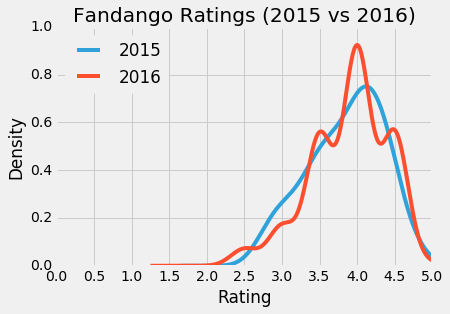

In [53]:
p1 = fang_2015['Fandango_Ratingvalue'].plot.kde(label='2015')
p2 = fang_2016['fandango'].plot.kde(label='2016')
plt.legend(loc='upper left')
plt.title('Fandango Ratings (2015 vs 2016)')
plt.xticks(np.arange(0, 6, step=0.5))
plt.xlim(0,5)
plt.xlabel('Rating')
plt.style.use('fivethirtyeight')

After creating the plot, we can see that both are definitely negatively skewed. Which means that the ratings had the tendency to be pretty high both in 2015 and 2016. 2016, however exhibits more granularity in its curve than 2015. 

This would suggest that, while the skew is the same, ratings may have become more "balanced" in the higher ranks after the analysis. In 2016, 4.0 ratings, for example, were far more common but so were 3.5 and 4.5 ratings. 

\* *There are more ratings in the 2016 set—191—which is exactly 62 more ratings (nearly a third of the 2015 set which has 129 ratings total)*

### Now I will take a look at the frequency distribution tables of the two sets.

In [ ]:
below_25 = fang_2015[fang_2015['Fandango_Ratingvalue'] <= 2.5]
bw_2635 = fang_2015[(fang_2015['Fandango_Ratingvalue'] > 2.5) & (fang_2015['Fandango_Ratingvalue'] <= 3.5)]
bw_3604 = fang_2015[(fang_2015['Fandango_Ratingvalue'] > 3.5) & (fang_2015['Fandango_Ratingvalue'] <= 4.0)]
bw_4105 = fang_2015[(fang_2015['Fandango_Ratingvalue'] > 4.0) & (fang_2015['Fandango_Ratingvalue'] <= 5.0)]


In [71]:
fang_2015['Fandango_Ratingvalue'].value_counts()

4.1    13
3.9    12
4.2    11
4.3     9
4.5     9
3.6     8
3.7     8
4.4     7
3.4     7
4.0     7
3.5     6
3.2     4
2.9     4
3.3     4
3.8     4
3.0     4
3.1     3
4.8     3
2.8     2
4.6     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64

In [72]:
fang_2016['fandango'].value_counts()

4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64

In [66]:
fang_2015['Fandango_Ratingvalue'].describe()

count    129.000000
mean       3.846512
std        0.505446
min        2.700000
25%        3.500000
50%        3.900000
75%        4.200000
max        4.800000
Name: Fandango_Ratingvalue, dtype: float64

In [67]:
fang_2016['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64